In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import power_transform
from scipy.stats import shapiro
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [26]:
df = pd.read_csv('Mappe1.csv')
data = df['v1']
data.values

array([1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1,
       0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
      dtype=int64)

[0 1 2] [21 16  6]
White p-test = 0.0000006197
[0 1 2] [11 28  4]
Asian p-test = 0.0000002442
[1 2 3] [11 29  3]
African American p-test = 0.0000000868


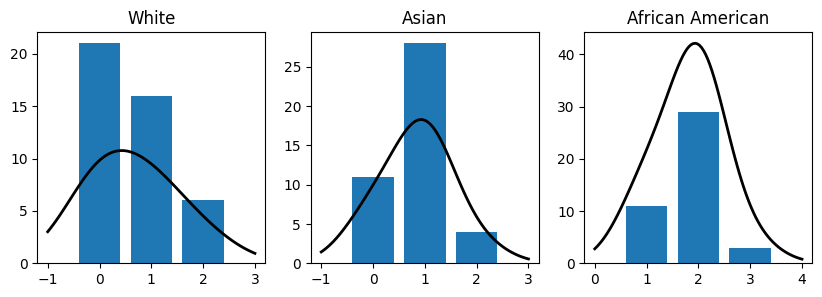

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
columns = ['White','Asian','African American']
data = ['v1','v2','v3']

for row, col in enumerate(columns):
    counts = df[data[row]]
    x_axs, y_axs = np.unique(counts,return_counts=True)
    x_axs_text = [str(n) for n in x_axs]
    print(x_axs,y_axs)
    axs[row].bar(x_axs, y_axs)
    axs[row].set_title(col)
    
    data_expanded = np.repeat(x_axs, y_axs)
    kde = gaussian_kde(data_expanded, bw_method=1)
    
    x = np.linspace(min(x_axs) - 1, max(x_axs) + 1, 100)
    y = kde(x) * sum(counts)  # Scale KDE to match histogram counts
    axs[row].plot(x, y, 'k-', linewidth=2)
    stat, p = shapiro(counts)
    print(f"{col} p-test = {p:.10f}")

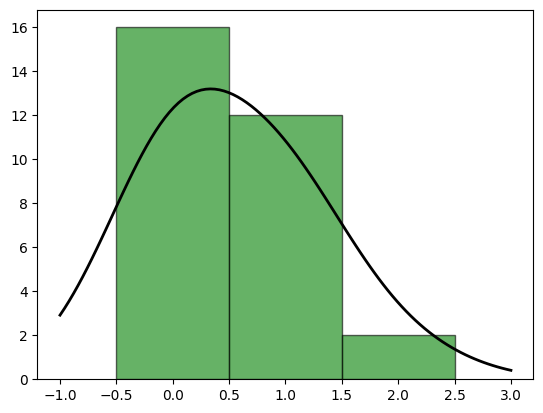

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Your data
counts = np.array([16,12,2])
data = np.array([0,1,2])  # Example counts for each bin

# Create the histogram
plt.bar(data, counts, width=1, alpha=0.6, color='g', edgecolor='black')

# Generate a new dataset by repeating each value according to its count
data_expanded = np.repeat(data, counts)
# Perform Kernel Density Estimate
kde = gaussian_kde(data_expanded, bw_method=1)
x = np.linspace(min(data) - 1, max(data) + 1, 100)
y = kde(x) * sum(counts)  # Scale KDE to match histogram counts
plt.plot(x, y, 'k-', linewidth=2)

plt.show()

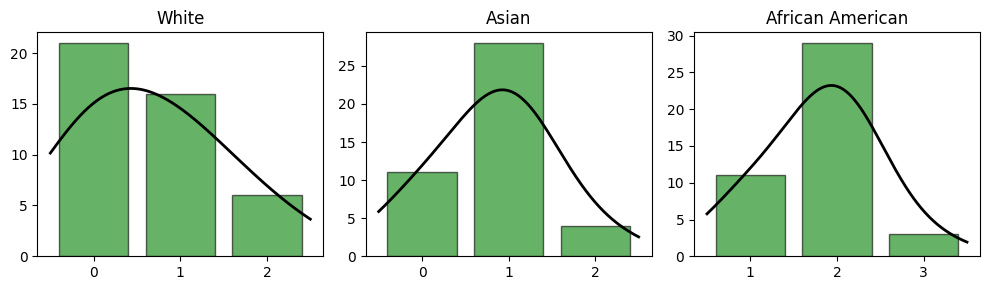

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, shapiro

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
columns = ['White', 'Asian', 'African American']
data = ['v1', 'v2', 'v3']

for i, (col, data_col) in enumerate(zip(columns, data)):
    counts = df[data_col].value_counts().sort_index()
    x_axs = counts.index.to_numpy()
    y_axs = counts.to_numpy()
    
    axs[i].bar(x_axs, y_axs, alpha=0.6, color='g', edgecolor='black')
    axs[i].set_title(col)
    
    data_expanded = np.repeat(x_axs, y_axs)
    kde = gaussian_kde(data_expanded, bw_method=1)
    
    x = np.linspace(min(x_axs) - 0.5, max(x_axs) + 0.5, 1000)
    y = kde(x) * sum(y_axs)
    axs[i].plot(x, y, 'k-', linewidth=2)
    

plt.tight_layout()
plt.show()


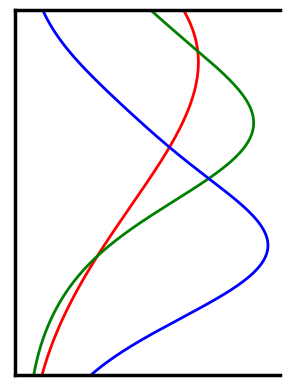

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd


columns = ['White', 'Asian', 'African American']
data = ['v1', 'v2', 'v3']
colors = ['r', 'g', 'b']

plt.figure(figsize=(3, 4))

# Scaling factor for the x-axis
scaling_factor = 1

for col, data_col, color in zip(columns, data, colors):
    counts = df[data_col].value_counts().sort_index()
    x_axs = counts.index.to_numpy()
    y_axs = counts.to_numpy()
    
    # Expanded data for KDE
    data_expanded = np.repeat(x_axs, y_axs)
    
    # KDE
    kde = gaussian_kde(data_expanded, bw_method=1)
    x = np.linspace(min(x_axs) - 2, max(x_axs) + 2, 1000)
    y = kde(x) * sum(y_axs)  # scale the KDE to the histogram counts
    
    # Apply the scaling factor to the x-axis
    scaled_y = y * scaling_factor
    
    # Plotting the KDE line sideways
    plt.plot(scaled_y, x, color=color, label=col, linewidth=2)

ax = plt.gca()
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

# Optionally, you can also adjust the bottom and left spines
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['top'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

plt.ylim(0, 3)
plt.yticks([])
plt.xticks([])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
